# Assignement - 7
## Cython
#### Mithesh M || EE22B060 ####
***

## Overview 

This assignment is based on various ways of optimizing matrix multiplication using numpy and cython and finally finding out the best optimizing way.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# Step-1
## Matrix Multiplication

In [14]:
#naive algorithm
def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [15]:
u = np.random.random((10,10))
v = np.random.random((10,10))

In [16]:

t_func =%timeit -o -n 1000 -r 3 matrix_multiply(u,v)
t_np = %timeit -o -n 1000 -r 3 u@v

581 µs ± 9.18 µs per loop (mean ± std. dev. of 3 runs, 1,000 loops each)
2.02 µs ± 177 ns per loop (mean ± std. dev. of 3 runs, 1,000 loops each)


| Runs  | matrix_multiply | Numpy/`u@v` |
| ----- | :-------------: | :---------------: |
| Run 1 | $536 \mu s$       | $1.99 \mu s$         |
| Run 2 | $556 \mu s$       | $2.12 \mu s$         |
| Run 3 | $564 \mu s$       | $2.03 \mu s$         |
| **Avg** | $\textbf{552}\mu \textbf{s}$ | $\textbf{2.05} \mu \textbf{s}$ |

***
On multiplying two matrices of dimensions **mxn** and **nxp**, 

The number of mulitplications involved in the process = $m\times p \times n = 10\times10\times10 = 10^3$

In [17]:
num_mul = 10 * 10 *10 # n x m x p
num_mul

1000

***
FLOPS = $\frac{Total \; FLOP}{Time}$

GFLOPS = $\frac{FLOPS}{10^9}$

Given Total Flop = 2 x Number of multiplications = $2\times10^3$

In [18]:
gflops_func = round(num_mul * 2 / t_func.average /10 ** 6) / 1000
gflops_func

0.003

In [19]:
gflops_np = round(num_mul * 2 / t_np.average / 10**6) / 1000
gflops_np

0.991

The GFLOPS I got for one of the run is 

| matrix_multiply | Numpy/`u@v` |
| :-------------: | :---------------: |
| $0.004$       | $0.986$         |

***
# Step-2

Using the lscpu command,


The maximum operating frequency of the CPU = $2.1\times10^9$ Hz  

Given 1 clock cycle performs 1 addition or multiplication

So, Max Gflops = 2.1 

So the Max Gflops tells us the maximum flops that our matrix mutliplication can have. 

But the numbers which we got are pretty low when compared to 2.1.

In [20]:
gfreq_cpu = 2.1 #in GHz

In [21]:
max_gflops = gfreq_cpu
max_gflops

2.1

***
# 3rd step

## Estimating times for different matrix size

In [37]:
u = np.random.random((160,160))
v = np.random.random((160,160))

In [40]:
#%timeit -n 2 -r 2 matrix_multiply(u,v)

2.51 s ± 94.9 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [42]:
#%timeit -n 10 -r 10 u@v

9.47 ms ± 3.82 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


| Algorithm Used | $10\times10$ | $20\times20$ | $40\times40$ | $80\times80$  |$80\times80$ |
| :------------: | :----------: | :----------: | :----------: | :----------:  | :----------: |
| matrix_multiply| $599 \mu s$  | $4.30 ms$    | $34.9 ms$    | $292 ms$      |$2.51 s$   |
| `u@v`          | $2.07\mu s$  | $3.87 \mu s$ | $18.70 \mu s$| $103.43 \mu s$|$9.47 ms$|


calculating...
plotting ...


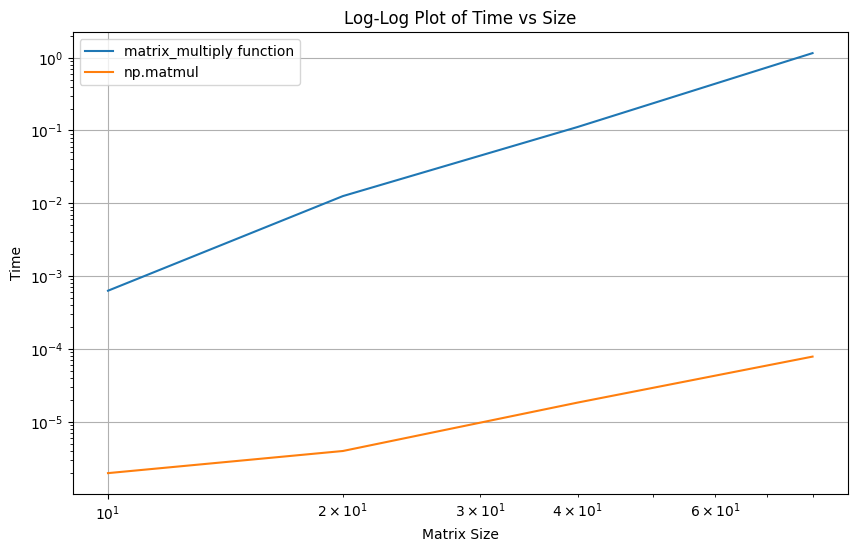

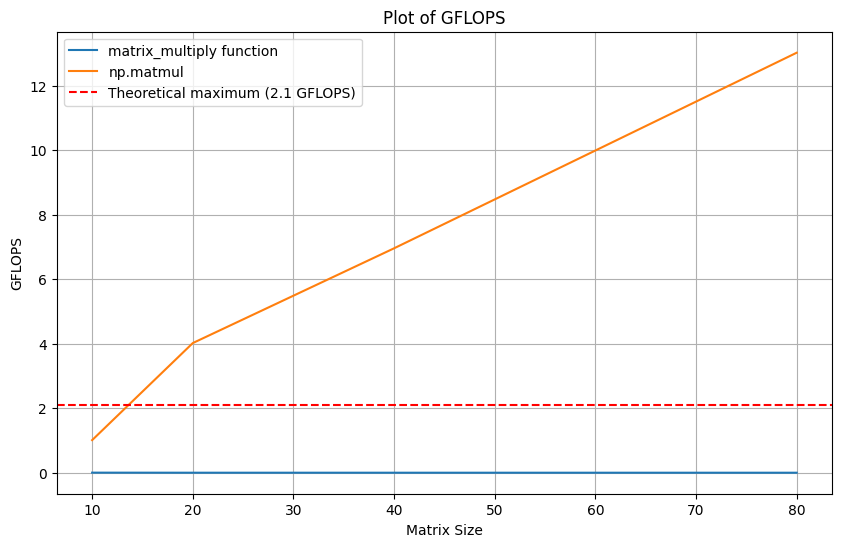

In [11]:
#3rd step
matmul_func_times = []
matmul_np_times = []
size_lst = []
gflops_func_lst = []
gflops_np_lst = []
size =10

print("calculating...")
while size <= 80:
    u = np.random.random((size,size))
    v = np.random.random((size,size))
    num_mul = size**3
    t_func = %timeit -o -q -n 3 -r 3 matrix_multiply(u,v)
    gflops_func = num_mul * 2 / t_func.best /10 ** 9

    t_np = %timeit -o -q -n 3 -r 3 u@v
    gflops_np = num_mul * 2 / t_np.best / 10**9

    matmul_func_times.append(t_func.best)
    matmul_np_times.append(t_np.best)
    gflops_func_lst.append(gflops_func)
    gflops_np_lst.append(gflops_np)
    size_lst.append(size)
    size *= 2 

print("plotting ...")
plt.figure(figsize=(10, 6))
plt.loglog(size_lst, matmul_func_times, label='matrix_multiply function')
plt.loglog(size_lst, matmul_np_times, label='np.matmul') 
plt.xlabel('Matrix Size')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.title('Log-Log Plot of Time vs Size')
plt.show()

# Plot gflops
plt.figure(figsize=(10, 6))
plt.plot(size_lst,gflops_func_lst, label='matrix_multiply function')
plt.plot(size_lst,gflops_np_lst, label='np.matmul')
plt.axhline(2.1, color='r', linestyle='--', label='Theoretical maximum (2.1 GFLOPS)')
plt.xlabel('Matrix Size')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title('Plot of GFLOPS')
plt.show()

The time increases with increase in matrix size. Also the estimated times are (which is done in the cell just before plotting the graph)

| Algorithm Used | $10\times10$ | $20\times20$ | $40\times40$ | $80\times80$  |$160\times160$ |
| :------------: | :----------: | :----------: | :----------: | :----------:  | :----------: |
| matrix_multiply| $599 \mu s$  | $4.30 ms$    | $34.9 ms$    | $278 ms$      |$2.21 s$   |
| `u@v`          | $2.07\mu s$  | $3.87 \mu s$ | $18.70 \mu s$| $103.43 \mu s$|$9.47 ms$|



The log-log plot for size vs time is linear. This means the plot of size vs time is exponiantially increasing.

In the tabular column also we can see that the time increases nearly exponiantially as size increases and time taken for `u@v` is less compared to matriz_multiply. 

Therefore the plot follows the expected path.

In [56]:
u = np.random.random((3500,3500))
v = np.random.random((3500,3500))

In [57]:
#%timeit -n 1 -r 1 u@v

1.52 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Time estimated by u@v

for 1000 x 1000, time = 79.5ms 

for 3000 x 3000 ,time = 984ms

for 3500 x 3500 ,time = 1.53s

for 5000 x 5000 ,time = 4.13s

for 10000 vs 10000 , time = 31.6s

Considering optimal time is less than 1s , the matrix of sze less than 3000(approx.) will fit in this category

### Estimating GFLOPS

Using the above tabular column for time we can calculate GFLOPS using its formula

The estimated Gflops is

| Algorithm Used | $10\times10$ | $20\times20$ | $40\times40$ | $80\times80$  |$160\times160$ |
| :------------: | :----------: | :----------: | :----------: | :----------:  | :----------: |
| matrix_multiply| $3.68 \times 10^{-3}$  | $3.72 \times 10^{-3}$    | $3.66 \times 10^{-3}$    | $3.68 \times 10^{-3}$      |$3.70 \times 10^{-3}$  |
| `u@v`          | $0.966$  | $4.13$ | $6.84$| $9.9$|$865$|

But we have max_Gflops = 2.1

The reason for higher g_flops in casse of numpy are

- NumPy relies on highly optimized libraries like BLAS and LAPACK, which are specifically designed to perform matrix operations efficiently. These libraries are often hand-tuned to take full advantage of the underlying hardware architecture.
- NumPy and underlying libraries like BLAS can take advantage of these multiple cores to perform computations in parallel, leading to higher performance than a simple theoretical estimate based on clock speed and instruction set.
- NumPy tries to keep data in contiguous memory blocks, which can improve cache utilization and reduce memory access times.


Also the plot obtained is similar to theoretical values,

The GFLOP of matrix_mulitply didn't change much whereas it increased for numpy.

# 4th step

In [58]:
#4th step
%load_ext Cython

In [59]:
%%cython --annotate
import numpy as np
def cy_matmul(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [63]:
u = np.random.random((50,50))
v = np.random.random((50,50))

In [68]:
%timeit cy_matmul(u,v)

55.5 ms ± 625 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%timeit matrix_multiply(u,v)

64.8 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


| Runs  | matrix_multiply | cy_matmul |
| ----- | :-------------: | :---------------: |
| Run 1 | $69 ms$       | $56.8 ms$         |
| Run 2 | $66.7 ms$       | $55.1 ms$         |
| Run 3 | $64.8 ms$       | $55.5 ms$         |
| **Avg** | $\textbf{67.46ms}$ | $\textbf{55.64ms}$|

Use of cython increases the efficiency little bit( we can see it above)

# 5th step

### 1st Transformation
#### Declare each of the variables i, j, k, m, n, p as int types

In [70]:
%%cython --annotate
import numpy as np
def cy_matmul1(u, v):
    cdef int i, j, k, m, n, p
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### 2nd Transformation
####  Use the decorator function @cython.boundscheck(False)

In [71]:
%%cython --annotate
import numpy as np
import cython
@cython.boundscheck(False)

def cy_matmul2(u,v):
    cdef inti, j, k, m, n, p
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### 3rd Transformation
#### Declare the input variables to be of type double[:, :]

In [91]:
%%cython --annotate
import numpy as np
import cython

@cython.boundscheck(False)

def cy_matmul3(double[:,:] u, double[:,:] v,res ):

    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### 4th Transformation
#### declare res also to be an argument to the function, of the same double[:,:] type

In [73]:
%%cython --annotate
import numpy as np
import cython

@cython.boundscheck(False)
def cy_matmul4(double[:,:] u, double[:,:] v, double[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

### 5th Transformation
#### Change the data type to float[:,:]

In [74]:
%%cython --annotate
import numpy as np
import cython

@cython.boundscheck(False)
def cy_matmul5(float[:,:] u, float[:,:] v, float[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [92]:
u = np.random.random((50,50))
v = np.random.random((50,50))
res = np.zeros((50, 50))

In [98]:
#%timeit matrix_multiply(u,v)

74.7 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
#%timeit u@v

34.6 µs ± 232 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [84]:
#%timeit cy_matmul1(u,v)

60.7 ms ± 814 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [85]:
#%timeit cy_matmul2(u,v)

59.1 ms ± 759 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
#%timeit cy_matmul3(u,v,res)

28.8 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [101]:
#%timeit cy_matmul4(u,v,res)

In [96]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
res = np.zeros((50, 50), dtype=np.float32)

In [97]:
#%timeit cy_matmul5(u,v,res)

132 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Observation

| Algorithm           | Time        |
| :-----------------: | :---------: |
| matrix_multiply     | $74.7 ms$  |
| cy_matmul   | $34.6 ms$  |
| cy_matmul1 | $60.7 ms$   |
| cy_matmul2 | $59.1 ms$ |
| cy_matmul3 | $28.8 ms$   |
| **cy_matmul4** | $\textbf{130} \mu \textbf{s}$ |
| cy_matmul5 | $132 \mu s$ |
| **u@v**   | $\textbf{34.1} \mu \textbf{s}$ |

Here we can see that Numpy.matmul / u@v has the min time.

# Conclusion

The change in the input data type to float[:,:] does not change anything. The time taken for double[:,:]  and float[:,:] are similar.

Numpy is better than cython for optimization of matriz mutliplication